# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

# Reading Data set

In [2]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

In [3]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# giving proper heading to my dataset

In [5]:
df_header = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species']
df.to_csv('Iris.csv', header = df_header, index = False)
df1= pd.read_csv('Iris.csv')

In [6]:
df1

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df1.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# no of rows and columns

In [8]:
df1.shape

(149, 5)

# checking null values in Dataset

In [9]:
df1.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# Describing the Dataset

In [10]:
df1.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# visualisation of dataset

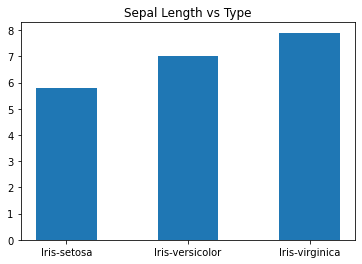

In [11]:
plt.bar(df1['Species'],df1['SepalLength'], width = 0.5) 
plt.title("Sepal Length vs Type")
plt.show()

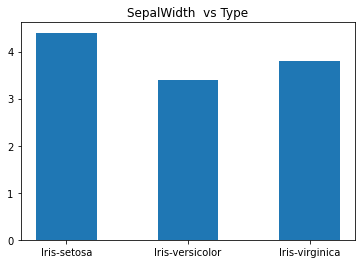

In [12]:
plt.bar(df1['Species'],df1['SepalWidth'],width=0.5)
plt.title("SepalWidth  vs Type")
plt.show()

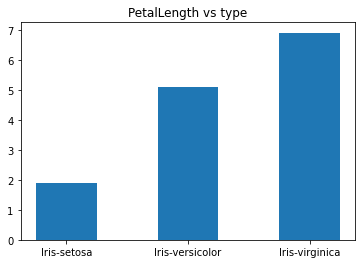

In [13]:
plt.bar(df1['Species'],df1['PetalLength'],width=0.5)
plt.title("PetalLength vs type")
plt.show()


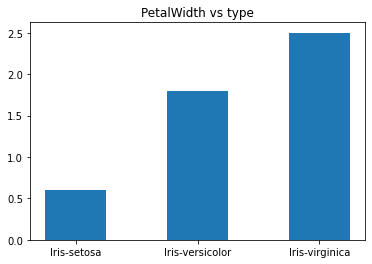

In [14]:
plt.bar(df1['Species'],df1['PetalWidth'],width=0.5)
plt.title("PetalWidth vs type")
plt.show()

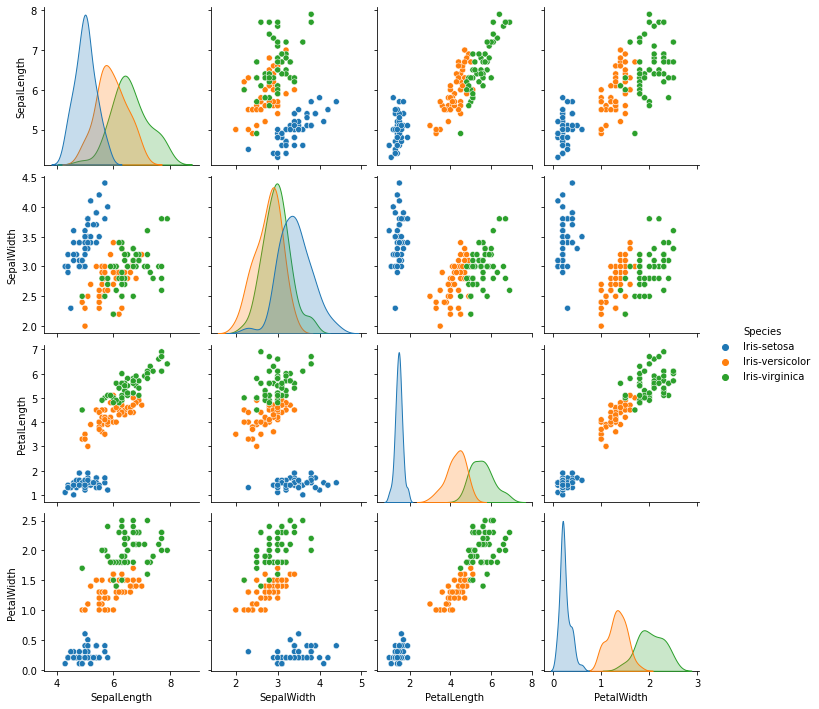

In [15]:
sns.pairplot(df1,hue="Species")

<AxesSubplot:ylabel='PetalWidth'>

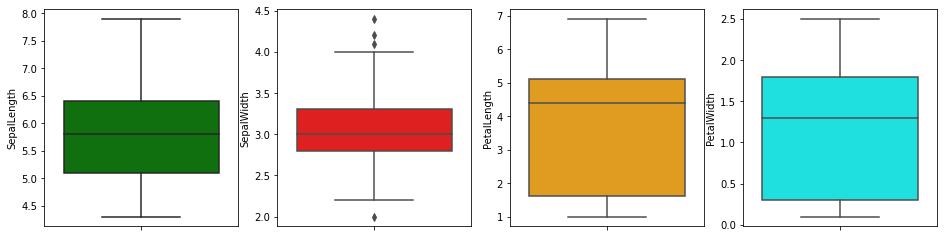

In [16]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df1,y='SepalLength',color='green')
plt.subplot(1,4,2)
sns.boxplot(data=df1,y='SepalWidth',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df1,y='PetalLength',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df1,y='PetalWidth',color='cyan')

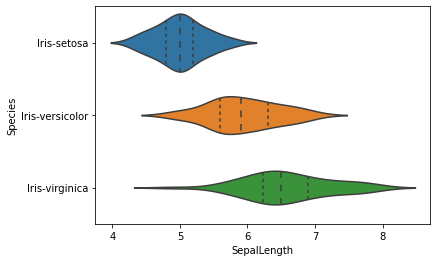

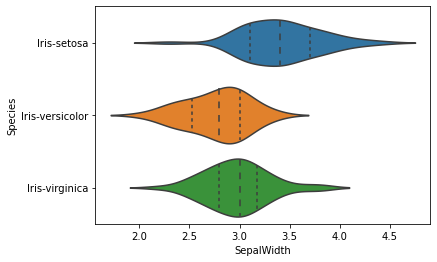

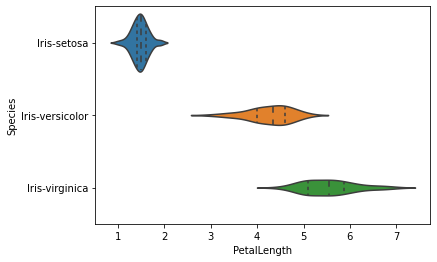

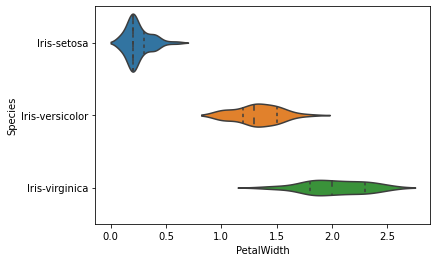

In [17]:
sns.violinplot(y='Species', x='SepalLength', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidth', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLength', data=df1, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidth', data=df1, inner='quartile')
plt.show()

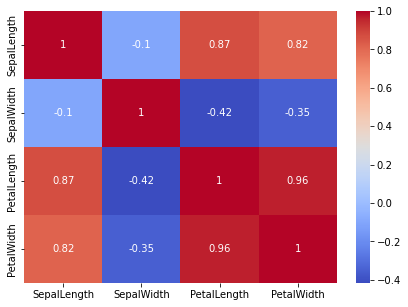

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(), annot=True,cmap='coolwarm')
plt.show()

# Building Model , Training and Testing

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df1['Species'] = le.fit_transform = (df1['Species'])
df1.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [21]:
from sklearn.model_selection import train_test_split      #Machine learning Model used to classify the three flowers
X = df1.drop(columns=['Species'])
Y = df1['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)

# 1.LOGISTIC REGRESSION

In [31]:
log_reg = LogisticRegression(max_iter=1000) 

In [32]:
log_reg.fit(x_train,y_train)   #train our ML Model

LogisticRegression(max_iter=1000)

In [33]:
log_reg.score(x_test,y_test)  #Checking Accuracy of the test dataset

0.9666666666666667

# My model is showing 97% accuracy.

# 2.SVC

In [39]:
# Initialize a Linear SVC
rbf_sv= SVC()
rbf_sv.fit(x_train,y_train)
L_svc=LinearSVC()

In [40]:
L_svc.fit(x_train,y_train)

C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [41]:
# Predict on the test set and calculate accuracy
y_pred=L_svc.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [43]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)

Linear SVC
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 96.67%


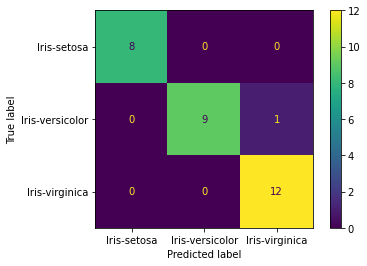

In [44]:
print('Linear SVC')
report(L_svc)
print(f'Accuracy: {round(score*100,2)}%')

# 3. Decision Tree Classifier

In [46]:
DTC = DecisionTreeClassifier()

In [47]:
DTC=DTC.fit(x_train,y_train)

In [48]:
# Predict on the test set and calculate accuracy
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy: 96.67%


C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


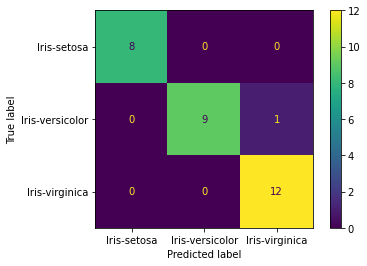

In [49]:
print('Decision Tree Classifier')
report(DTC)
print(f'Accuracy: {round(score*100,2)}%')

# 5. KNN

In [52]:
KNN=KNeighborsClassifier(n_neighbors=6)

In [53]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [55]:
# Predict on the test set and calculate accuracy
y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)

KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.80      1.00      0.89         8
 Iris-virginica       1.00      0.86      0.92        14

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.94        30
   weighted avg       0.95      0.93      0.93        30

Accuracy: 93.33%


C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


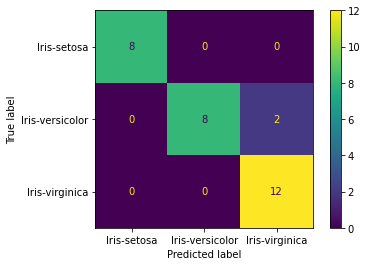

In [56]:
print('KNN')
report(KNN)
print(f'Accuracy: {round(score*100,2)}%')